In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('HR/HR_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [2]:
# rename some columns
df.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'department'}, inplace=True)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Dictionary

Variable | Description | Type of Variable | Range
---|---|---|---
satisfaction_level | Satisfaction level of employee based on survey | Continuous | [0.09, 1]
last_evaluation | Score based on employee's last evaluation | Continuous | [0.36, 1]
number_project | Number of projects | Continuous | [2, 7]
average_monthly_hours | Average monthly hours | Continuous | [96, 310]
time_spend_company | Years at company | Continuous | [2, 10]
Work_accident | Whether employee had a work accident | Categorical | {0, 1}
left | Whether employee had left (Outcome Variable) | Categorical | {0, 1}
promotion_last_5years | Whether employee had a promotion in the last 5 years | Categorical | {0, 1}
department | Department employee worked in | Categorical | 10 departments 
salary | Level of employee's salary | Categorical | {low, medium, high}

In [3]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


- Highest correlation is between number of projects and average monthly hours (`0.42`)
- Variable that has highest correlation with outcome variable (`left`) is `satisfaction_level` with `-0.39`

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

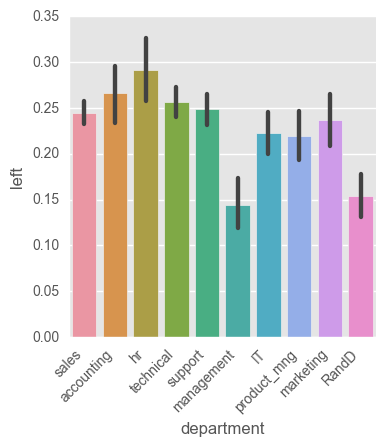

In [5]:
# Attrition by department
plot = sns.factorplot(x='department', y='left', kind='bar', data=df)
plot.set_xticklabels(rotation=45, horizontalalignment='right');

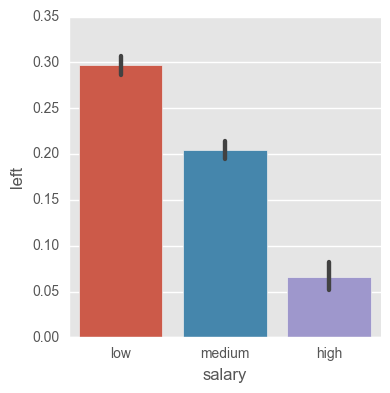

In [6]:
# Attrition by salary level
plot = sns.factorplot(x='salary', y='left', kind='bar', data=df);

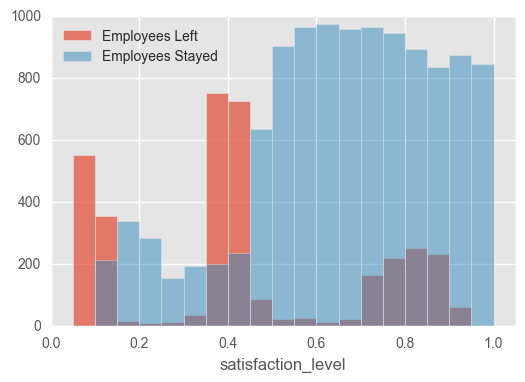

In [7]:
# Satisfaction level vs. Attrition
bins = np.linspace(0.0001, 1.0001, 21)
plt.hist(df[df['left']==1]['satisfaction_level'], bins=bins, alpha=0.7, label='Employees Left')
plt.hist(df[df['left']==0]['satisfaction_level'], bins=bins, alpha=0.5, label='Employees Stayed')
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

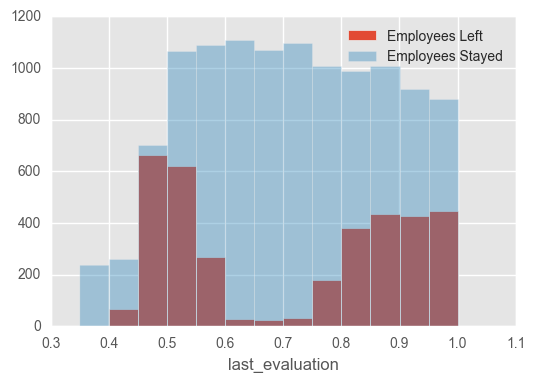

In [8]:
# Last evaluation vs. Attrition
bins = np.linspace(0.3501, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('last_evaluation')
plt.legend(loc='best');

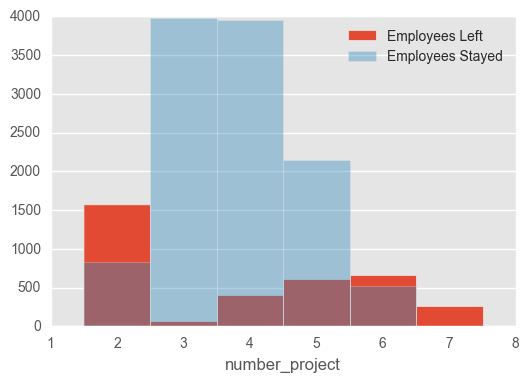

In [9]:
# Number of projects vs. Attrition
bins = np.linspace(1.5, 7.5, 7)
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('number_project')
plt.grid(axis='x')
plt.legend(loc='best');

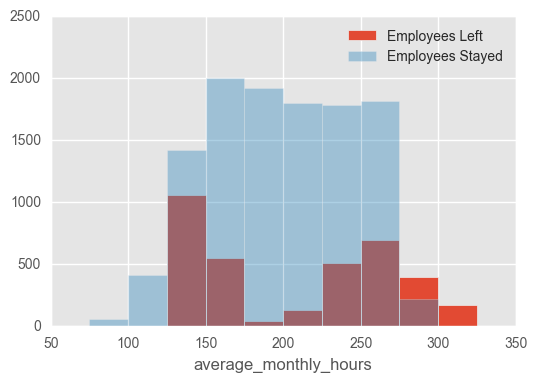

In [10]:
# Average monthly hours vs. Attrition
bins = np.linspace(75, 325, 11)
plt.hist(df[df['left']==1]['average_monthly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['average_monthly_hours'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('average_monthly_hours')
plt.legend(loc='best');

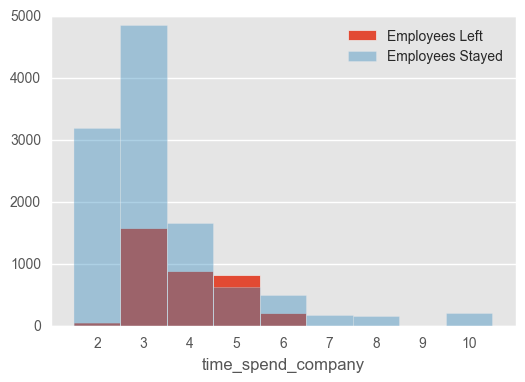

In [11]:
# Years at company vs. Attrition
bins = np.linspace(1.5, 10.5, 10)
plt.hist(df[df['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['time_spend_company'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('time_spend_company')
plt.xlim((1,11))
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.legend(loc='best');

EDA Summary
- Departments: Management and R&D have low attrition, while others are similar.
- Salary: Higher paid -> less likely to leave.
- Satisfaction level: 3 clusters of employees leaving (satisfied, below average and disgruntled)
- Last evaluation: two large groups of former employees, high performing group and poorly performing group, explains the nearly zero correlation between last_evaluation and the outcome variable.
- Number of projects: too few projects = bad, too many projects = bad. Sweet spot is in the 3-4 range.
- Average monthly hours: similar to number of projects, attrition exists in both long and short hours worked. Sweet spot of low attrition is around the median value of 200 hours. (Ignoring employees with less than 125 hours worked - possibly part-time workers.)
- Years at company: nobody left after working 7 years or longer in the company. Employees in the year 5 group have the highest flight risk.

In [12]:
X = df.drop('left', axis=1)
y = df['left']

In [13]:
X.drop(['department','salary'], axis=1, inplace=True)

In [14]:
salary_dummy = pd.get_dummies(df['salary'])
department_dummy = pd.get_dummies(df['department'])

In [15]:
# from EDA, only management and R&D had attrition different from the rest.
X[['managment','RandD']] = department_dummy[['management', 'RandD']]

In [16]:
X[['salary_high', 'salary_medium']] = salary_dummy[['high', 'medium']]

In [17]:
# Split Training Set from Testing Set (70/30)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
# Scaling features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [19]:
# Cross validation
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=20, test_size=0.3)

In [20]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,11), 'weights': ['uniform', 'distance']}
clf = GridSearchCV(knn, parameters, cv=cv)
clf.fit(X_train_std, y_train)
clf.best_params_

{'n_neighbors': 8, 'weights': 'distance'}

In [22]:
best_knn = clf.best_estimator_

In [23]:
from sklearn.model_selection import cross_val_score

print cross_val_score(best_knn, X_train_std, y_train, scoring='accuracy', cv=5).mean()

0.972568429154


In [24]:
best_knn.score(X_test_std, y_test)

0.97599999999999998

- K-nearest neighbors performs well in predicting which employees have left on the test data set. (98% accuracy)

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [34]:
rf_param = {'n_estimators': range(1,11)}
rf_grid = GridSearchCV(rf_model, rf_param, cv=cv)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'n_estimators': 9}

In [35]:
best_rf = rf_grid.best_estimator_

In [36]:
cross_val_score(best_rf, X_train, y_train, scoring='accuracy', cv=5).mean()

0.9868558700353447

In [37]:
best_rf.score(X_test, y_test)

0.98777777777777775

In [38]:
# feature importance scores
features = X.columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,satisfaction_level,0.382351
2,number_project,0.189290
4,time_spend_company,0.153951
3,average_monthly_hours,0.142197
1,last_evaluation,0.108173
5,Work_accident,0.007427
10,salary_medium,0.004956
9,salary_high,0.004895
7,managment,0.003182
6,promotion_last_5years,0.001980


- Random forest performs even better in predictions. (99% accuracy on the test set.)
- Feature importance scores indicate that the top 5 features are informative while the remaining are not.

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
log_param = {'C': np.linspace(1e-5, 1e5, 21), 'class_weight': [None, 'balanced']}
log_grid = GridSearchCV(logreg, log_param, cv=cv)
log_grid.fit(X_train_std, y_train)
log_grid.best_params_

{'C': 5000.0000094999996, 'class_weight': None}

In [41]:
best_logreg = log_grid.best_estimator_
cross_val_score(best_logreg, X_train_std, y_train, scoring='accuracy', cv=5).mean()

0.78531015539912818

In [42]:
best_logreg.score(X_test_std,y_test)

0.77822222222222226

- Logistic regression does not perform well here. Predicting no one leaves will result in 76% accuracy.
- How about we select only the five features from random forest feature importance scores?

In [45]:
reduced_features = ['satisfaction_level', 'time_spend_company', 
                    'number_project', 'average_monthly_hours', 'last_evaluation']
X2_train = X_train[reduced_features]
X2_test = X_test[reduced_features]

In [46]:
stdsc2 = StandardScaler()
X2_train_std = stdsc2.fit_transform(X2_train)
X2_test_std = stdsc2.transform(X2_test)

In [47]:
logreg2 = LogisticRegression()
log_grid2 = GridSearchCV(logreg2, log_param, cv=cv)
log_grid2.fit(X2_train_std, y_train)
log_grid2.best_params_

{'C': 5000.0000094999996, 'class_weight': None}

In [48]:
best_logreg2 = log_grid2.best_estimator_
cross_val_score(best_logreg2, X2_train_std, y_train, scoring='accuracy', cv=5).mean()

0.77064348540668604

In [49]:
best_logreg2.score(X2_test_std,y_test)

0.76088888888888884

- Barely outperforms the "dumb" model of predicting that no employees will leave.
- Most likely there is nonlinearity in the features and feature interaction that the logistic regression model does not capture.

In [50]:
# K-mean clustering
from sklearn.cluster import KMeans

X2 = X[reduced_features]
X2_std = stdsc2.fit_transform(X2)

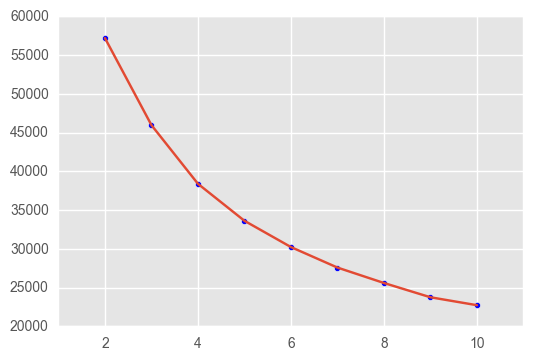

In [51]:
x = []
y = []
for n in range(2,11):
    km = KMeans(n_clusters=n, random_state=7)
    km.fit(X2_std)
    x.append(n)
    y.append(km.inertia_)
plt.scatter(x, y)
plt.plot(x,y);

In [59]:
km = KMeans(n_clusters=7, n_init=20, random_state=7)
km.fit(X2_std)
columns = {str(x): stdsc2.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=X2.columns)

,0,1,2,3,4,5,6
satisfaction_level,0.800510,0.418864,0.719596,0.157226,0.730666,0.632441,0.722155
time_spend_company,4.674549,3.059299,2.799443,4.255228,3.016859,7.647349,2.788147
number_project,4.560672,2.326146,3.675487,5.721402,4.148849,3.657213,3.522266
average_monthly_hours,244.263846,149.544474,242.528552,251.386839,160.866776,193.293465,190.363130
last_evaluation,0.901176,0.532892,0.636779,0.817146,0.613997,0.686178,0.884565


In [61]:
# Percentage of employees left for each cluster. Helps identify which cluster to direct our focus.
kmpredict = pd.DataFrame(data=df['left'])
kmpredict['cluster'] = km.labels_
kmpredict.groupby('cluster').mean()

,left
cluster,
0,0.549252
1,0.594917
2,0.024390
3,0.582411
4,0.017674
5,0.018496
6,0.022891


- There are 3 groups that have high probability of leaving: clusters 0, 1 and 3.
- Cluster 0: Their satisfaction level is high and they are a high performing bunch. The workload is in the higher end, but satisfaction level suggests they don't mind it. They are coming up on 5 years of service and possibly looking for different opportunities. This is the key group we need to focus on for retention.
- Cluster 1: Poor performing group (bottom quartile). Not very happy. Does not have many projects assigned to and working hours are short.
- Cluster 3: High performing, but overworked. Very disgruntled group. Need to reassign some of their projects to other groups (such as Clusters 5 and 6)